In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KernelDensity

In [2]:
Pol = pd.read_excel('Degron_Log2_table_140.xlsx')

In [4]:
Pol.head()

,Gene_name,WT_control_value,WT_log2_ratio,WT_Input_control_value,WT_Input_log2_ratio,Taf1_Input_control_value,Taf1_Input_log2_ratio,Taf1_control_value,Taf1_log2_ratio,Taf2_control_value,...,Taf13_control_value,Taf13_log2_ratio,Med14_control_value,Med14_log2_ratio,WT_minus_SM_control_value,WT_minus_SM_log2_ratio,WT_SM_control_value,WT_SM_log2_ratio,Taf1_SM_control_value,Taf1_SM_log2_ratio
0,YDL065C,0.362639,0.642885,0.539910,-0.441307,0.719078,0.127743,0.512531,-1.561846,0.956236,...,0.308789,-2.488808,1.104972,-3.155815,0.349137,-0.803471,0.542111,-1.046110,0.190790,-0.211893
1,YMR195W,6.724054,-0.279872,0.643080,-0.599536,1.034468,0.037409,4.674302,-0.016954,3.971393,...,2.449984,-0.800580,9.596473,-4.761195,7.918071,0.225170,18.235858,-0.842693,12.536098,-0.364005
2,YNL325C,0.715918,-0.207474,0.508503,-0.552971,0.810313,-0.205766,0.605134,-1.154896,0.608900,...,0.358569,-1.153971,0.647398,-2.097132,0.917144,0.558014,0.672478,-0.146077,0.479749,-0.476856
3,YFL013C,0.721648,0.176197,0.429395,-0.464326,0.669150,-0.023081,0.639996,-1.691404,0.743345,...,0.315093,-1.286799,1.155491,-2.894989,0.291183,-0.068655,1.074051,-1.027129,0.409890,-0.453752
4,YER113C,0.786887,0.438375,0.561270,-0.652135,0.769385,0.205255,0.648763,-1.649812,0.903522,...,0.382426,-2.063858,1.387747,-2.997539,0.686064,0.179249,0.519800,-0.427114,0.246779,-0.542005


In [5]:
sgd = pd.read_csv('SGD.csv')

In [7]:
sgd.dropna(inplace=True)

<font color='red',size='5'> Kernel PDF</font>

In [42]:
def kernelPDF(x, y, bandwidth=0, kernel_choose='epanechnikov'):
    
    # Prepare "histogram-like" data
    histo = []
    for i in range(len(y)):
        for j in range(y[i]):
            histo.append(x[i])

    histo = np.array(histo)
    
    #busco la optima bw si no esta definida como argumento
    if locals()['bandwidth']==0:
        bandwidth = np.std(histo)*(4/(3.0*len(histo)))**(1/5)
        
    # Kernel Density Estimation with Scikit-learn
    kde = KernelDensity(kernel=kernel_choose, bandwidth=bandwidth).fit(histo[:,np.newaxis])
    pdf = np.exp(kde.score_samples(x[:,np.newaxis]))
    
    return pdf, locals()['bandwidth']

In [85]:
his4 = pd.read_csv('HIS4.csv')

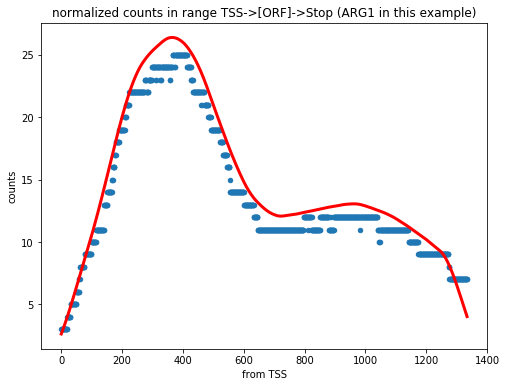

In [89]:
his4.plot.scatter(x='from TSS', y='counts', figsize=(8,6), title='normalized counts in range TSS->[ORF]->Stop (ARG1 in this example)')
tft = np.array(his4[['from TSS','counts']].values)
pdf, local = kernelPDF(tft[:,0], tft[:,1], 90)
plt.plot(pdf*20000, color='r', lw=3)

In [95]:
np.log2(97)

6.5999128421871278